#### Outlier Detection with Isolation Forest

- The main idea, which is different from other popular outlier detection methods, is that Isolation Forest explicitly identifies anomalies instead of profiling normal data points. 

- Isolation Forest, like any tree ensemble method, is built on the basis of decision trees. 

- In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature

Each observation is given an __anomaly score__ and the following decision can be made on its basis:

- Score close to 1 indicates anomalies
- Score much smaller than 0.5 indicates normal observations
- If all scores are close to 0.5 than the entire sample does not seem to have clearly distinct anomalies

In [5]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import savefig
from sklearn.ensemble import IsolationForest

In [6]:
# Generating data ----

rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

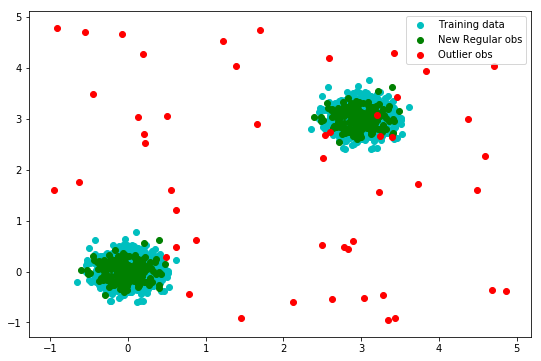

In [4]:
plt.figure(figsize=(9, 6))
plt.scatter(X_train['x1'],    X_train['x2'],    c='c' , label='Training data' )
plt.scatter(X_test['x1'],     X_test['x2'],     c='g' , label='New Regular obs' )
plt.scatter(X_outliers['x1'], X_outliers['x2'], c='r' , label='Outlier obs' )
plt.legend();